# M2.S3. OpenMP

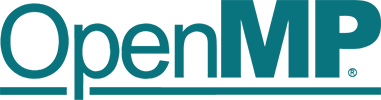

## 3.1 Hello World OpenMP

Let's print the statement "Hello world!" using all the threads. Here the variable tid gives your thread id. Our server has only two threads. Threfore, the Hello world! will be printed twice.


### Example 2.7 - Create your first OPenMP multithread program in C and compile it
In this case we will need to compile the C code. We have saved the following openmp code in the file /openmp/omp_hello.c

```
#include <omp.h>
#include <stdio.h>

int main(int argc, char *argv[]) {

 int nthreads, tid;

 /* Fork a team of threads with each thread having a private tid variable */
 #pragma omp parallel private(tid)
   {

   /* Obtain and print thread id */
   tid = omp_get_thread_num();
   printf("Hello World! from thread = %d\n", tid);

   /* Only master thread does this */
   if (tid == 0) 
     {
     nthreads = omp_get_num_threads();
     printf("Number of threads = %d\n", nthreads);
     }

   }  /* All threads join master thread and terminate */

 }
```

What we will do is to execute compile the code `gcc -o omp_helloc -fopenmp omp_hello.c`
Note that the environment variable OMP_NUM_THREADS was used to specify number of threads (2).
and we execute the code `./omp_helloc`



In [13]:
%%bash
cd ./openmp
gcc -o omp_helloc -fopenmp omp_hello.c
export OMP_NUM_THREADS=2
./omp_helloc

Hello World! from thread = 1
Hello World! from thread = 0
Number of threads = 2



If you want to change the code you can do it from the left panel. Select your file inside folder openmp and modify it (do not forget to save it with File/save). 
Do not forget that you will need to compile it. You can reuse the previous code above or run the same commands directlyl in the terminal.

You can launch a terminal directly from jupyter launcher or just from docker (if from docker you can sue the `bash` command from docker to get a proper bash terminal). 

To do it from jupyter, start a Terminal in the Launcher tab. You can use the terminal to launchany command, including slurm jobs via commands.

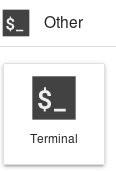

Try to change the number of THREADS with `export OMP_NUM_THREADS=4` You do not need tocompile the program again.  


In [14]:
%%bash
cd ./openmp
gcc -o omp_helloc -fopenmp omp_hello.c
export OMP_NUM_THREADS=4
./omp_helloc

Hello World! from thread = 3
Hello World! from thread = 1
Hello World! from thread = 2
Hello World! from thread = 0
Number of threads = 4


## 3.2 OpenMP reduction

The reduction clauses are data-sharing attribute clauses that can be used to perform some forms of recurrence calculations in parallel.

### Example 2.8 - Array Addition with OpenMP parallel programming

Let's now try to understand how to parallelize a simple for loop using OpenMP. For example, we want to sum-up all the numbers from 1-12, but using 3 threads in parallel. Let's observe the following figure

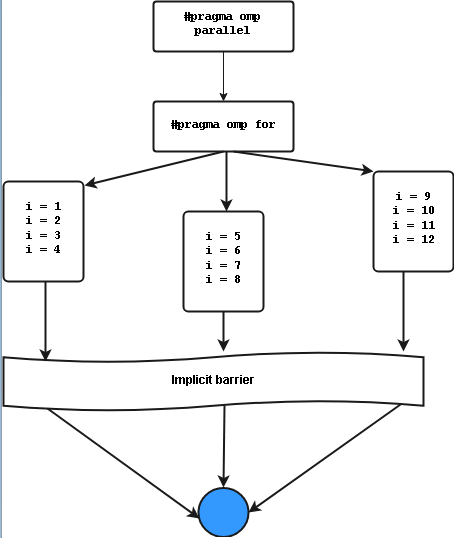

The code will be something like this:

```
#include <iostream>
#include <omp.h>
#include <cmath>

int main(){
    double sum_i = 0;
    #pragma omp parallel for reduction(+:sum_i)
    for (int i=0; i<12; i++){
        sum_i += i;
       
    }
    std::cout << "Sum = " << sum_i << std::endl;
    return 0;
}
```

And we will compile it and run it. The previous code was C, but this is C++, so we will use the `g++` compiler, the sintax is very similar as you can see. We will pass again the option `-fopenmp` to the compiler. To tell that it should use as many threads as available cores.


In [17]:
%%bash
cd ./openmp
g++ -o array_addition array_addition.cpp -fopenmp
./array_addition

Sum = 66


You can modify the C++ source code of the program and see the result after compiling it. 

For example, would you like to see the thread id of each thread, what would you change?

    int tid;
    #pragma omp parallel for reduction(+:sum_i)
    for (int i=0; i<12; i++){
        sum_i += i;
        tid = omp_get_thread_num();
        printf("threadid = %d\n", tid);   
        



## 3.2 OpenMP Sections

The section construct is one way to distribute different tasks to different threads. The syntax of this construct is:

```#pragma omp parallel 
{
    #pragma omp sections
    {
        #pragma omp section
        {
            // structured block 1
        }

        #pragma omp section
        {
            // structured block 2
        }

        #pragma omp section
        {
            // structured block 3
        }           

        ...
    }
}
````

The sections construct distributes the blocks/tasks between existing threads. The requirement is that each block must be independent of the other blocks. Then each thread executes one block at a time. Each block is executed only once by one thread. There are no assumptions about the order of the execution. The distribution of the tasks to the threads is implementation defined. If there are more tasks than threads, some of the threads will execute multiple blocks. If there are more threads than tasks, some of the threads will be idle. 

### Example 2.9 - OpenMP Sections

Let's now try to understand how sections work:

The code will be something like this:

```
#include <stdio.h>
#include <omp.h>

int main(){
      
#pragma omp parallel sections
{
    #pragma omp section
    {
        printf ("section 1 id = %d, \n", omp_get_thread_num()); 
    }
    #pragma omp section
    {
        printf ("section 2 id = %d, \n", omp_get_thread_num());
    }
    #pragma omp section
    {
        printf ("section 3 id = %d, \n", omp_get_thread_num());
    }
}  return 0;
}
```

And we will compile it and run it. The previous code was C++, but this is C, so we will use the `gcc` compiler, the sintax is very similar as you can see. We will pass again the option `-fopenmp` to the compiler. To tell that it should use as many threads as available cores.

which shows how the sections may be executed in any order, by any available thread


In [22]:
%%bash
cd ./openmp
gcc -o sections -fopenmp sections.c
./sections

section 2 id = 0, 
section 1 id = 2, 
section 3 id = 1, 


## 3.2 OpenMP Barrier

The section construct is one way to distribute different tasks to different threads. The syntax of this construct is:

```#pragma omp barrier 
````

The sections construct distributes the blocks/tasks between existing threads. The requirement is that each block must be independent of the other blocks. Then each thread executes one block at a time. Each block is executed only once by one thread. There are no assumptions about the order of the execution. The distribution of the tasks to the threads is implementation defined. If there are more tasks than threads, some of the threads will execute multiple blocks. If there are more threads than tasks, some of the threads will be idle. 

### Example 2.10 - OpenMP Barrier

Let's now try to understand how barrier works:

The omp barrier directive identifies a synchronization point at which threads in a parallel region will wait until all other threads in that section reach the same point. Statement execution past the omp barrier point then continues in parallel.

The code will be something like this:

```
#include <stdio.h>
#include <omp.h>

int main(){
  int x;
  x = 2;
  #pragma omp parallel num_threads(2) shared(x)
  {
    if (omp_get_thread_num() == 0) {
      x = 5;
    } else {
      /* Print A: the following read of x has a race */
      printf("A: Thread# %d: x = %d\n", omp_get_thread_num(),x );
    }

    #pragma omp barrier
    
    if (omp_get_thread_num() == 0) {
      /* Print B */
      printf("B: Thread# %d: x = %d\n", omp_get_thread_num(),x );
     } else {
      /* Print C */
      printf("C: Thread# %d: x = %d\n", omp_get_thread_num(),x );
      }
  }
return 0;
}
```

And we will compile it and run it. The previous code was C++, but this is C, so we will use the `gcc` compiler, the sintax is very similar as you can see. We will pass again the option `-fopenmp` to the compiler. To tell that it should use as many threads as available cores.

Section parallelization: The value of x could be either 2 or 5, depending on the timing of the threads, and the implementation of the assignment to x.


In [36]:
%%bash
cd ./openmp
gcc -o barrier -fopenmp barrier.c
./barrier

A: Thread# 1: x = 5
B: Thread# 0: x = 5
C: Thread# 1: x = 5
